In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from PIL import Image
import math
from mplsoccer import PyPizza, add_image, FontManager, Sbopen

In [2]:
PLAYER_1 = "Brian Brobbey"
POS ="FW"

In [3]:
df= pd.read_csv(r"C:\Users\jawah\Documents\Football Analysis\Data\fbref_outfield_player_stats_Bundesliga_2021-2022_latest.csv")

df = df[df['Pos'].str.contains(POS)] #filter by position
team = df[df['Player'] == PLAYER_1].iloc[0]['Squad']

params = ['Player','Sh/90','Dist', 'npxG', 'SCA90',
          'xA', 'Prog','1/3', 'KP',
          'Att 3rd', 'Mid 3rd', 'Att 3rd.1', 'Mid 3rd.1']
display_params = ['Shots/90','shots Avg distance', 'Expected Goals', 'Shot-Creating Actions/90',
                  'Expected Assists', 'Progressive Passes','Final 1/3 Passes', 'Key Passes',
                 'Att 1/3 Tackles', 'Middle 1/3 Tackles',  'Att 1/3 Pressures', 'Middle 1/3 Pressures']

cols = df.columns.drop('Player')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df=df[params]

In [4]:
plot_params = params[1:]

player = df.loc[df['Player'] == PLAYER_1].reset_index()
player = list(player.iloc[0])[2:]

In [6]:
values = []

for x in range(len(plot_params)):
    values.append(math.floor(stats.percentileofscore(df[plot_params[x]], player[x])))


In [9]:
# font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
#                            "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
# font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
#                            "Roboto-Italic%5Bwdth,wght%5D.ttf?raw=true"))
# font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
#                          "RobotoSlab%5Bwght%5D.ttf?raw=true"))

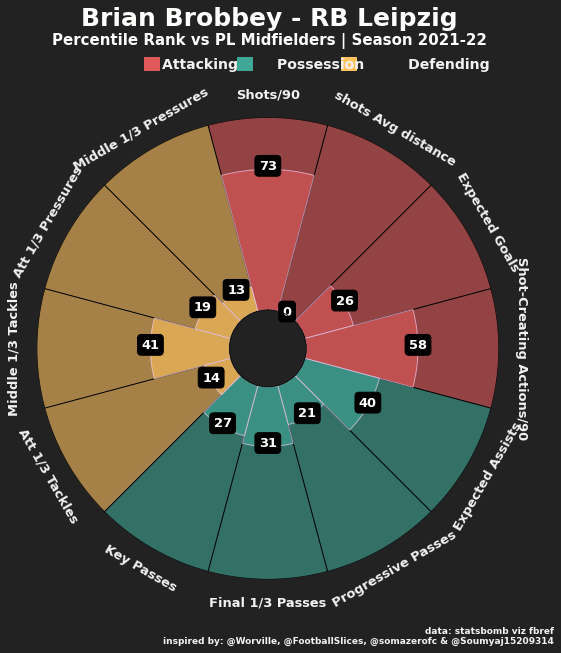

In [12]:

slice_colors = ["#e05a5a"] * 4 + ["#3FA796"] * 4 + ["#FEC260"] * 4
text_colors = ["#ffffff"] * 12

# instantiate PyPizza class
baker = PyPizza(
    params=display_params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8.5, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.6,                 # alpha for blank-space colors
    param_location = 112, 
    kwargs_slices=dict(
        edgecolor="#ffd6fe", zorder=2, linewidth=1, alpha =0.6
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=13, zorder=10,
#         fontproperties=font_normal.prop, 
        va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#e05a5a", fontsize=13,
#         fontproperties=font_normal.prop, 
        zorder=2,
#         bbox=dict(
#             edgecolor="red", facecolor="red",
#             boxstyle="round,pad=0.4", lw=2, color="#1c1f1e"
#         )
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.3", lw=1, 
                 color='#000000')
    )                                # values to be used when adding parameter-values labels
)


fig.text(
    0.515, 1.03, "%s - %s" %(PLAYER_1, team), size=25,
    ha="center", color="#fffefc"
)

# add subtitle
fig.text(
    0.515, 1,
    "Percentile Rank vs PL Midfielders | Season 2021-22",
    size=15,
    ha="center",  color="#fffefc"
)
# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.98, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
#     fontproperties=font_italic.prop, 
    color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.96, "Attacking        Possession         Defending", size=14,
#     fontproperties=font_bold.prop,
    color="#F2F2F2"
)


fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9575), 0.025, 0.021, fill=True, color="#e05a5a",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9575), 0.025, 0.021, fill=True, color="#3FA796",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9575), 0.025, 0.021, fill=True, color="#FEC260",
        transform=fig.transFigure, figure=fig
    ),
])

# # add image
# ax_image = add_image(
#     fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
# )   # these values might differ when you are plotting

plt.show()

fig.savefig('./viz/%s_2.png'%(PLAYER_1), dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)